### ASTR 8070: Astrostatistics
***S. R. Taylor***
___

# Homework 7
### Due: Saturday, Mar 30th at 11.59pm CT
---

This is a regression problem. Many of the parts require minor variations of code to switch to new techniques, but otherwise using a similar workflow. 

Note of warning: the data I have provided have associated uncertainties, `yerr`. `sklearn` and `astroML` have different formats for using uncertainties; in `sklearn` fitting you can provide `sample_weight=1/yerr**2`, while in `astroML` fitting you can directly provide `y_error=yerr`.

1. Read in `hw7_data_1.npy`. The dataset should consist of $500$ samples. The first two columns are the two data features, `X`. The third column is the target labels, `y`, and the final column are the heteroscedastic uncertainties on the labels, `yerr`. Make a 2-panel scatter plot of the labels versus each feature.


2. Use multivariate linear regression on this data with its uncertainties (`astroML` rather than plain `sklearn` is the better option here). Print the best-fit intercept and slopes for the features. Make a prediction `Xgrid` over $50$ values from the min to the max value of each feature, and plot the best-fit model on a duplicate of the $2$-panel plot from (1); does this look like a good description of the data?


3. Make a new two-dimensional prediction meshgrid `Xgrid` over the $2$-D feature space, use your best-fit model to predict the labels, and make a $3$-D interactive plot showing the data and your best-fit over the entire space. You may find the following code useful.

In [ ]:
# install the relevant interactive plot packages
# only do this once
!pip install ipywidgets ipympl

In [ ]:
# Makes the plot interactive. 
# You can pan the image.

### always do this line at the start 
### of an interactive plotting cell
%matplotlib widget 
fig = plt.figure(figsize=(8, 8))

ax = fig.add_subplot(111, projection='3d')

ax.plot(___, ___, y, color='k', 
        zorder=15, linestyle='none', 
        marker='o', alpha=0.5)
ax.scatter(___.flatten(), ___.flatten(), ___, 
           facecolor=(0,0,0,0), s=20, 
           edgecolor='#70b3f0')
ax.set_xlabel('X[0]', fontsize=12)
ax.set_ylabel('X[1]', fontsize=12)
ax.set_zlabel('Target', fontsize=12)

ax.view_init(elev=28, azim=120)

In [ ]:
### Always do this line at the start
### of a static plotting cell
%matplotlib inline

4. Sticking with a linear model, now attempt a `GridSearchCV` procedure on the data to find the best `Ridge` regression hyper-parameters. Use the following `param_grid`:
```
ridge_params = {'alpha': [0.05,0.1,0.2,0.5,1.0], 'solver': ['svd', 'lsqr']}
```
What are the `best_params_` and the `best_score_` from this? Fit the data with the best options, and visualize interactively. Try `RidgeCV` also; what cross-validated `alpha_` does it return, and does this agree with `GridSeachCV`? *(Hint: remember to revert to inline matplotlib when you're done each time you make an interactive plot.)*


5. Now model the data using Gaussian process regression and the default kernel. Check what the fit looks like with and with and without uncertainties accounted for. *(Hint: GPR in `sklearn` takes an `alpha` parameter equal to `(yerr/y)**2`.)*


6. Let's look finally at polynomial fitting. Fit a $4$th degree polynomial to the data. Print the best-fit regression coefficients, predict on the 2D meshgrid, and visualize interactively as before. How does this look compared to the linear model and GPR models?


7. Sticking with polynomial fitting, let's find the optimal hyper-parameters through cross-validation. 
- Using `sklearn.model_selection.train_test_split`, first do a train-test split with a `test_size` of $20\%$. Then split out $20\%$ of the training set itself as a cross-validation set (leaving a somewhat smaller set to use for training). Note that you'll need to simultaneously split out `yerr` as well by just providing this as another array to `train_test_split`.
- Compute the training and cross-validation rms errors (and from those, the BIC values) as a function of polynomial degree from $1$ to $10$ inclusive. Plot the rms errors and BIC values as a function of the polynomial degree. 
- Choose the optimal polynomial degree, and train on all training data from the first `train_test_split` operation. Predict the labels of the held-out test set, and finally compute the testing rms error.

Part 1

In [1]:
# import section
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
from astroML.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import RidgeCV
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
import numpy as np
import matplotlib.pyplot as plt



/opt/anaconda3/envs/astr8070/lib/python3.10/site-packages/astroML/linear_model/linear_regression_errors.py:10: UserWarning: LinearRegressionwithErrors requires PyMC3 to be installed
  warnings.warn('LinearRegressionwithErrors requires PyMC3 to be installed')


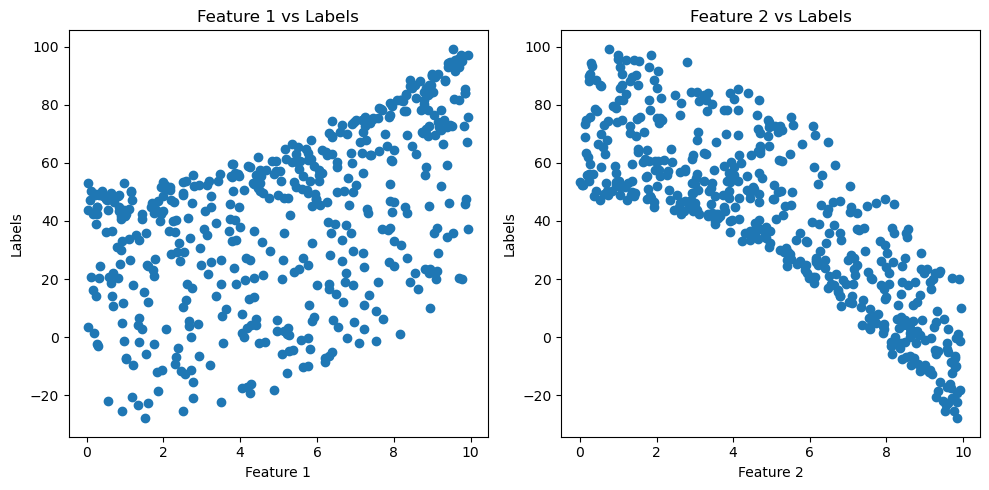

(array([[7.89482470e+00, 2.63234381e+00],
        [5.23667439e-01, 5.16213039e-01],
        [4.36807264e+00, 4.49797669e+00],
        [9.02019387e-01, 5.22076883e+00],
        [9.78903126e+00, 9.89811355e+00],
        [9.45400948e+00, 2.78191988e+00],
        [4.26173541e+00, 5.50099792e-01],
        [6.59241531e+00, 1.67069289e+00],
        [7.39734159e+00, 4.14937136e+00],
        [6.20226770e+00, 9.79055839e+00],
        [4.75152979e+00, 3.89707886e+00],
        [6.91205252e+00, 1.22285682e-01],
        [5.87007872e+00, 5.35816687e+00],
        [7.16273325e+00, 2.13704138e+00],
        [3.32748470e-01, 6.02805972e+00],
        [1.93100830e+00, 3.59913813e+00],
        [1.72619757e+00, 5.88120042e+00],
        [7.26958724e+00, 3.04535689e+00],
        [5.21301802e+00, 8.80251708e+00],
        [1.75971234e+00, 3.45806451e+00],
        [1.02840078e+00, 3.09926152e+00],
        [7.90004716e+00, 7.42005159e+00],
        [1.02463841e+00, 8.73578446e+00],
        [5.76148455e+00, 2.1897904

In [2]:
def plot_data(filepath):
    # Load the data
    data = np.load(filepath)

    # Split the data into features, labels, and uncertainties
    X = data[:, :2]
    y = data[:, 2]
    yerr = data[:, 3]

    # Create a 2-panel scatter plot of the labels versus each feature
    fig, axs = plt.subplots(1, 2, figsize=(10, 5))

    axs[0].scatter(X[:, 0], y)
    axs[0].set_title('Feature 1 vs Labels')
    axs[0].set_xlabel('Feature 1')
    axs[0].set_ylabel('Labels')

    axs[1].scatter(X[:, 1], y)
    axs[1].set_title('Feature 2 vs Labels')
    axs[1].set_xlabel('Feature 2')
    axs[1].set_ylabel('Labels')

    plt.tight_layout()
    plt.show()

    return X, y, yerr
# Call the function with the file path
plot_data("../../homeworks/hw_data/hw7_data_1.npy")

Part 2

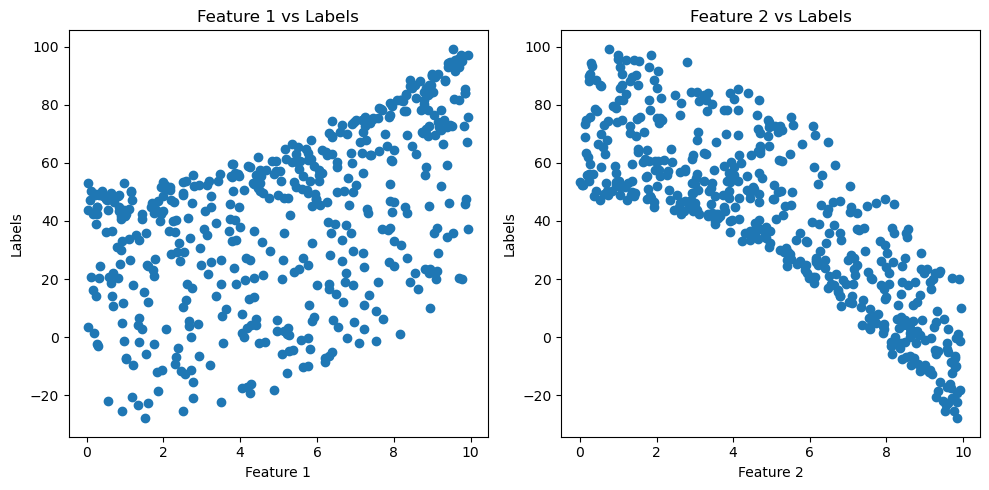

Intercept: 56.56808603864029
Slopes: [ 4.89522621 -8.19074038]


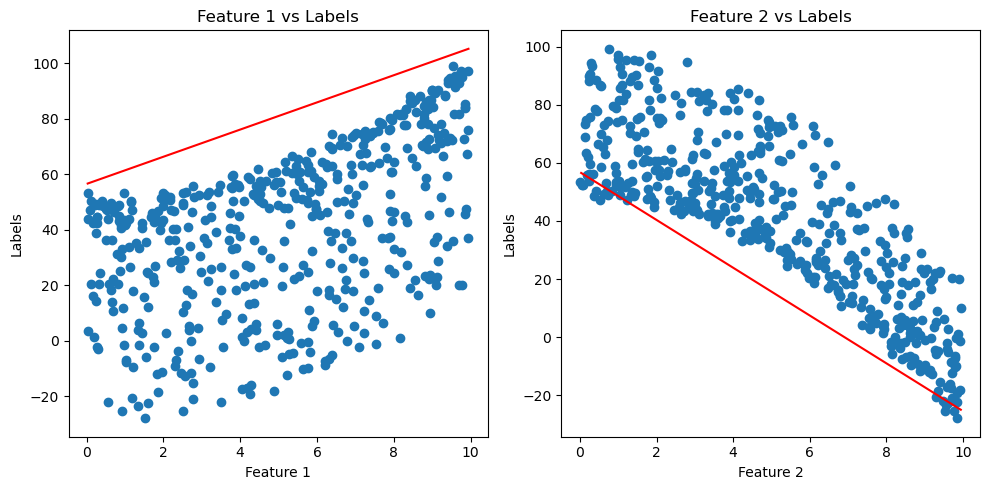

(LinearRegression(),
 [array([ 5.63261074e+01,  5.46684785e+01,  5.30108496e+01,  5.13532207e+01,
          4.96955918e+01,  4.80379629e+01,  4.63803340e+01,  4.47227051e+01,
          4.30650762e+01,  4.14074473e+01,  3.97498185e+01,  3.80921896e+01,
          3.64345607e+01,  3.47769318e+01,  3.31193029e+01,  3.14616740e+01,
          2.98040451e+01,  2.81464162e+01,  2.64887873e+01,  2.48311584e+01,
          2.31735295e+01,  2.15159007e+01,  1.98582718e+01,  1.82006429e+01,
          1.65430140e+01,  1.48853851e+01,  1.32277562e+01,  1.15701273e+01,
          9.91249841e+00,  8.25486952e+00,  6.59724063e+00,  4.93961174e+00,
          3.28198284e+00,  1.62435395e+00, -3.32749391e-02, -1.69090383e+00,
         -3.34853272e+00, -5.00616161e+00, -6.66379051e+00, -8.32141940e+00,
         -9.97904829e+00, -1.16366772e+01, -1.32943061e+01, -1.49519350e+01,
         -1.66095639e+01, -1.82671927e+01, -1.99248216e+01, -2.15824505e+01,
         -2.32400794e+01, -2.48977083e+01]),
  array([ 

In [3]:
def linear_regression_with_plot(filepath):
    # Load the data
    X, y, yerr = plot_data(filepath)

    # Perform linear regression
    model = LinearRegression(fit_intercept=True)
    model.fit(X, y)  # yerr is not used here

    # Print the best-fit intercept and slopes
    print("Intercept:", model.coef_[0])
    print("Slopes:", model.coef_[1:])

    # Create a grid for each feature and make the predictions
    Xgrids = []
    y_preds_1 = []
    y_preds_2 = []

    for i in range(X.shape[1]):  # start from 1 because 0 is the intercept
        Xgrid = np.linspace(np.amin(X[:,i]), np.amax(X[:,i]), 50)
        y_pred_1 = model.coef_[1]*Xgrid + model.coef_[0]  # use model.coef_[0] as the intercept
        y_pred_2 = model.coef_[2]*Xgrid + model.coef_[0]  # use model.coef_[0] as the intercept

        Xgrids.append(Xgrid)
        y_preds_1.append(y_pred_1)
        y_preds_2.append(y_pred_2)

        # Create a 2-panel scatter plot of the labels versus each feature
    fig, axs = plt.subplots(1, 2, figsize=(10, 5))

    axs[0].scatter(X[:, 0], y)
    axs[0].plot(Xgrids[0], y_preds_1[0], color='red')
    axs[0].set_title('Feature 1 vs Labels')
    axs[0].set_xlabel('Feature 1')
    axs[0].set_ylabel('Labels')

    axs[1].scatter(X[:, 1], y)
    axs[1].plot(Xgrids[0], y_preds_2[1], color='red')
    axs[1].set_title('Feature 2 vs Labels')
    axs[1].set_xlabel('Feature 2')
    axs[1].set_ylabel('Labels')

    plt.tight_layout()
    plt.show()

    return model, y_preds_2
# Call the function with the file path
linear_regression_with_plot("../../homeworks/hw_data/hw7_data_1.npy")

This not not fit the data good at all 

SRT: Good

part 3

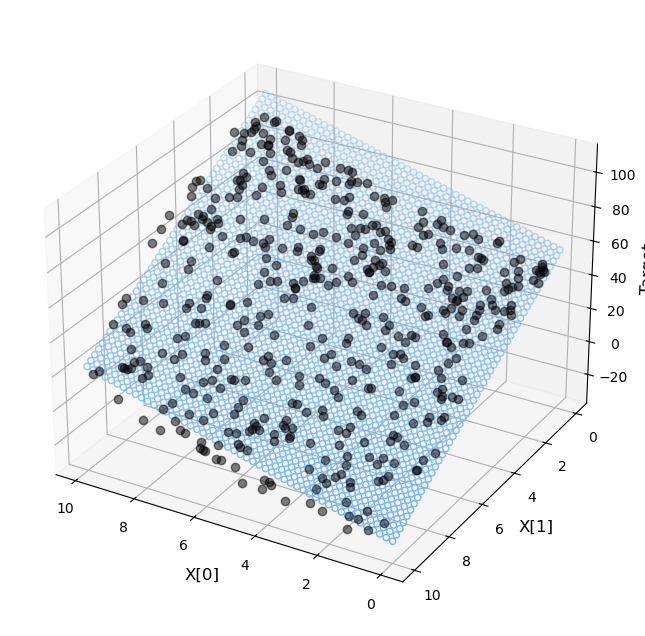

In [67]:
def load_and_plot_data(filepath):
    # Load the data from the file
    data = np.load(filepath)

    # Split the data into features, labels, and uncertainties
    X = data[:, :2]
    y = data[:, 2]
    yerr = data[:, 3]

    model = LinearRegression()
    model.fit(X, y, yerr)

    x1 = np.linspace(X[:, 0].min(), X[:, 0].max())
    x2 = np.linspace(X[:, 1].min(), X[:, 1].max())

    Xgrid = np.vstack(list(map(np.ravel, np.meshgrid(x1, x2)))).T
    y_pred = model.predict(Xgrid) #predicting labels with best fit model

    fig = plt.figure(figsize=(8, 8))

    ax = fig.add_subplot(111, projection='3d')

    ax.plot(X[:,0], X[:,1], y, color='k', 
            zorder=15, linestyle='none', 
            marker='o', alpha=0.5)
    ax.scatter(Xgrid[:,0].flatten(), Xgrid[:,1].flatten(), y_pred, 
               facecolor=(0,0,0,0), s=20, 
               edgecolor='#70b3f0')
    ax.set_xlabel('X[0]', fontsize=12)
    ax.set_ylabel('X[1]', fontsize=12)
    ax.set_zlabel('Target', fontsize=12)

    ax.view_init(elev=28, azim=120)
    plt.show()

# Use the function
load_and_plot_data("../../homeworks/hw_data/hw7_data_1.npy")

part 4

In [73]:
# Load the data from the file
data = np.load("../../homeworks/hw_data/hw7_data_1.npy")
yerr = data[:, 3]

# Define the parameter grid
ridge_params = {'alpha': [0.05,0.1,0.2,0.5,1.0], 'solver': ['svd', 'lsqr']}

# Create a Ridge regressor object
ridge = Ridge()

# Create the GridSearchCV object
grid = GridSearchCV(ridge, ridge_params, cv=5)

# Fit the data
grid.fit(X, y, sample_weight=1 / yerr**2)

# Print the best parameters and the best score
print("Best parameters: ", grid.best_params_)
print("Best score: ", grid.best_score_)

Best parameters:  {'alpha': 1.0, 'solver': 'svd'}
Best score:  0.929182742615996


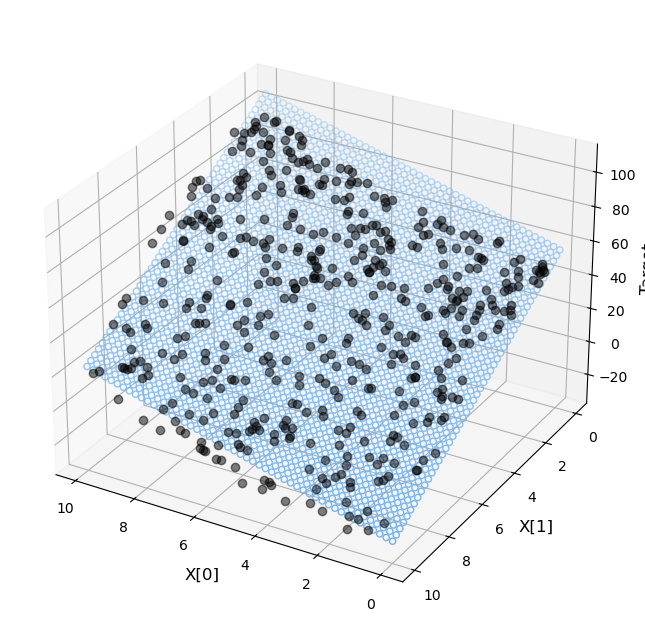

In [77]:
# Create a Ridge regression model with alpha=1.0 and solver='lsqr'
ridge_model = Ridge(alpha=1.0, solver='lsqr')

# Fit the model to the data X and y, using weights inversely proportional to the square of the errors yerr
ridge_model.fit(X, y, sample_weight=1/yerr**2)

# Use the trained model to make predictions on Xgrid
ridge_y_pred = ridge_model.predict(Xgrid)

%matplotlib inline 
fig = plt.figure(figsize=(8, 8))

ax = fig.add_subplot(111, projection='3d')

ax.plot(X[:,0], X[:,1], y, color='k', 
        zorder=15, linestyle='none', 
        marker='o', alpha=0.5)
ax.scatter(Xgrid[:,0], Xgrid[:,1], ridge_y_pred, 
           facecolor=(0,0,0,0), s=20, 
           edgecolor='#70b3f0')
ax.set_xlabel('X[0]', fontsize=12)
ax.set_ylabel('X[1]', fontsize=12)
ax.set_zlabel('Target', fontsize=12)

ax.view_init(elev=28, azim=120)

In [79]:
# Use RidgeCV to find the best alpha
ridgecv = RidgeCV(alphas=[0.05,0.1,0.2,0.5,1.0])
ridgecv.fit(X, y, sample_weight=1/yerr**2)

print("Best alpha from RidgeCV: ", ridgecv.alpha_)

# Check if the best alpha from RidgeCV agrees with GridSearchCV
if ridgecv.alpha_ == grid.best_params_['alpha']:
    print("The best alpha from RidgeCV agrees with GridSearchCV.")
else:
    print("The best alpha from RidgeCV does not agree with GridSearchCV.")

Best alpha from RidgeCV:  1.0
The best alpha from RidgeCV agrees with GridSearchCV.


part 5

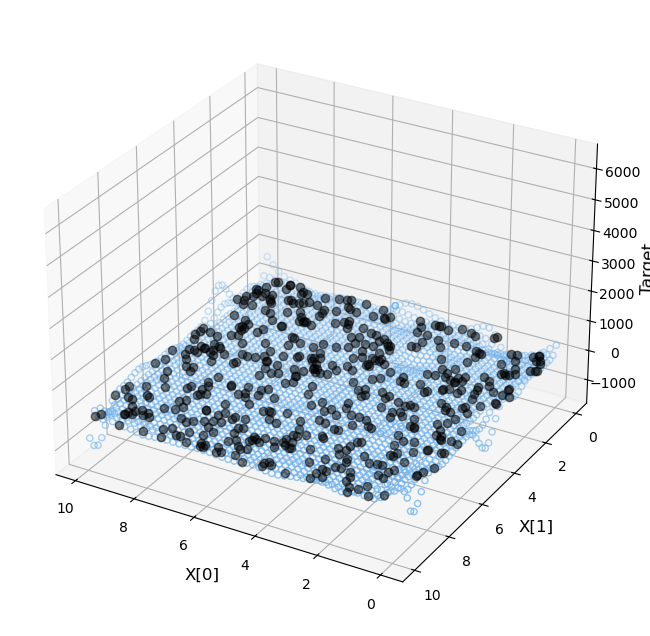

In [86]:
# Create a Gaussian Process Regressor object
gpr = GaussianProcessRegressor()

# Fit the model to the data without uncertainties
gpr.fit(X, y)

# Make predictions
y_pred_no_uncertainties = gpr.predict(Xgrid)

# Fit the model to the data with uncertainties
gpr_with = GaussianProcessRegressor(alpha=(yerr/y)**2)

gpr_with.fit(X,y)

# Make predictions
y_pred_with_uncertainties = gpr_with.predict(Xgrid)

%matplotlib inline 
fig = plt.figure(figsize=(8, 8))

ax = fig.add_subplot(111, projection='3d')

ax.plot(X[:,0], X[:,1], y, color='k', 
        zorder=15, linestyle='none', 
        marker='o', alpha=0.5)
ax.scatter(Xgrid[:,0], Xgrid[:,1], y_pred_no_uncertainties, 
           facecolor=(0,0,0,0), s=20, 
           edgecolor='#70b3f0')
ax.set_xlabel('X[0]', fontsize=12)
ax.set_ylabel('X[1]', fontsize=12)
ax.set_zlabel('Target', fontsize=12)

ax.view_init(elev=28, azim=120)

Im not sure why my z axis which is target goes up to 6000, maybe there is a target that makes it up to the 6000s and of so I cant really see it

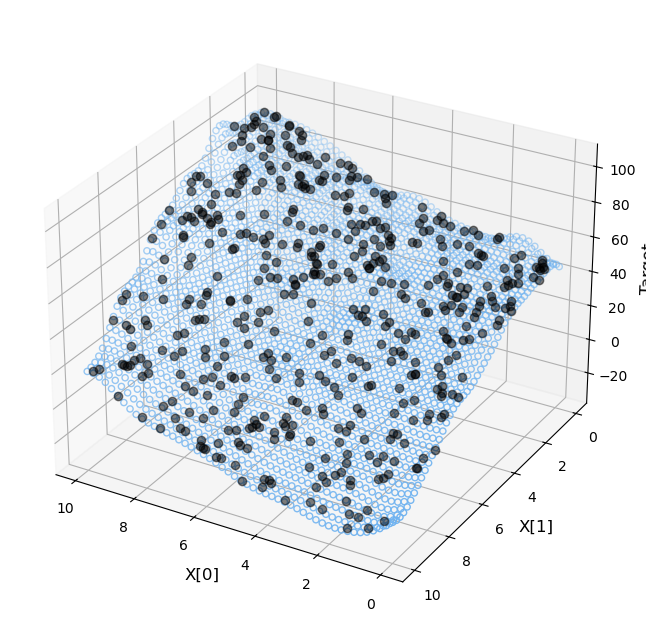

In [87]:
y_pred_with_uncertainties = gpr_with.predict(Xgrid)

%matplotlib inline 
fig = plt.figure(figsize=(8, 8))

ax = fig.add_subplot(111, projection='3d')

ax.plot(X[:,0], X[:,1], y, color='k', 
        zorder=15, linestyle='none', 
        marker='o', alpha=0.5)
ax.scatter(Xgrid[:,0], Xgrid[:,1], y_pred_with_uncertainties, 
           facecolor=(0,0,0,0), s=20, 
           edgecolor='#70b3f0')
ax.set_xlabel('X[0]', fontsize=12)
ax.set_ylabel('X[1]', fontsize=12)
ax.set_zlabel('Target', fontsize=12)

ax.view_init(elev=28, azim=120)

With uncertainity this model seems to fit the data pretty well

part 6

In [88]:
# Create a model for a 4th degree polynomial
model = make_pipeline(PolynomialFeatures(4), LinearRegression())

# Fit the model to the data
model.fit(X, y)

# Print the coefficients of the polynomial
print('Coefficients: \n', model.named_steps['linearregression'].coef_)

# Predict on the 2D meshgrid
y_pred_poly = model.predict(Xgrid)

Coefficients: 
 [ 0.00000000e+00  3.26437755e-01  7.04566290e-02  3.76478281e-01
 -2.37398556e-02 -8.70986046e-01  1.19122182e-02  2.54637597e-02
 -1.32002013e-02  2.02705370e-02 -4.53796076e-04 -5.21142180e-04
 -2.06194460e-03  1.68744189e-03 -1.52054198e-03]


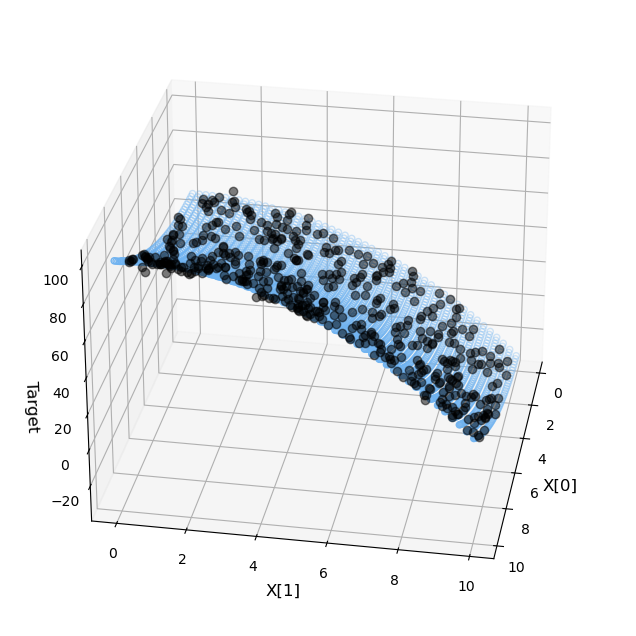

In [92]:
%matplotlib inline 
fig = plt.figure(figsize=(8, 8))

ax = fig.add_subplot(111, projection='3d')

ax.plot(X[:,0], X[:,1], y, color='k', 
        zorder=15, linestyle='none', 
        marker='o', alpha=0.5)
ax.scatter(Xgrid[:,0], Xgrid[:,1], y_pred_poly, 
           facecolor=(0,0,0,0), s=20, 
           edgecolor='#70b3f0')
ax.set_xlabel('X[0]', fontsize=12)
ax.set_ylabel('X[1]', fontsize=12)
ax.set_zlabel('Target', fontsize=12)

ax.view_init(elev=28, azim=10)

Honestly this model seems to fit the data pretty well the residuals are almost all zero, which is a good sign that our model

SRT: Good observations and commentary.

part 7

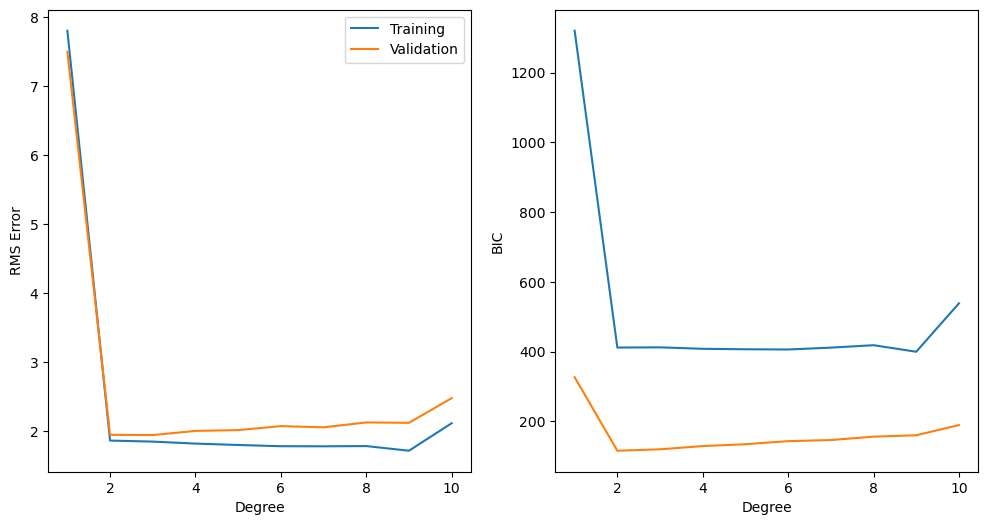

Testing RMS error:  2.2789258536752204


In [98]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test, yerr_train, yerr_test = train_test_split(X, y, yerr, test_size=0.2, random_state=42)

# Further split the training set into training and validation sets
X_train, X_val, y_train, y_val, yerr_train, yerr_val = train_test_split(X_train, y_train, yerr_train, test_size=0.2, random_state=42)

rms_train = []
rms_val = []
degrees = range(1, 11)
bic_train = []
bic_val = []

for degree in degrees:
    # Create a model for the polynomial
    model = make_pipeline(PolynomialFeatures(degree), LinearRegression())

    # Fit the model to the training data
    model.fit(X_train, y_train)

    # Compute the training and validation rms errors
    y_train_pred = model.predict(X_train)
    y_val_pred = model.predict(X_val)
    rms_train.append(np.sqrt(mean_squared_error(y_train, y_train_pred)))
    rms_val.append(np.sqrt(mean_squared_error(y_val, y_val_pred)))

    # Compute the BIC values for training and validation sets
    bic_train.append(len(y_train) * np.log(mean_squared_error(y_train, y_train_pred)) + degree * np.log(len(y_train)))
    bic_val.append(len(y_val) * np.log(mean_squared_error(y_val, y_val_pred)) + degree * np.log(len(y_val)))


# Plot the rms errors and BIC values as a function of the polynomial degree
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(degrees, rms_train, label='Training')
plt.plot(degrees, rms_val, label='Validation')
plt.xlabel('Degree')
plt.ylabel('RMS Error')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(degrees, bic_train, label='Training')
plt.plot(degrees, bic_val, label='Validation')
plt.xlabel('Degree')
plt.ylabel('BIC')

plt.show()

# Choose the optimal polynomial degree and train on all training data
optimal_degree = degrees[np.argmin(bic_train)]  # or np.argmin(bic_val) if you want to use the validation BIC
model = make_pipeline(PolynomialFeatures(optimal_degree), LinearRegression())
model.fit(X_train, y_train)

# Predict the labels of the held-out test set
y_test_pred = model.predict(X_test)

# Compute the testing rms error
rms_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
print('Testing RMS error: ', rms_test)

SRT: Small mistake with the BIC calculation. The BIC is related to the log likelihood, and so does not need the training or crossval errors to have their logarithms taken. -2 points.

SRT: Excellent work otherwise!